Implementing tokenization and count vectorization from scratch 

Implementing TF-IDF from scratch 

Using dimensionality reduction on vectorized text data to create and interpret visualization

In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt', quiet=True)
np.random.seed(0)

In [8]:
filenames = [f'song{str(i)}.txt' for i in range(1,21)] 
filenames

['song1.txt',
 'song2.txt',
 'song3.txt',
 'song4.txt',
 'song5.txt',
 'song6.txt',
 'song7.txt',
 'song8.txt',
 'song9.txt',
 'song10.txt',
 'song11.txt',
 'song12.txt',
 'song13.txt',
 'song14.txt',
 'song15.txt',
 'song16.txt',
 'song17.txt',
 'song18.txt',
 'song19.txt',
 'song20.txt']

using list comprehension to create a list containing the name of every single song

In [3]:
with open('data/song18.txt') as f:
    test_song = f.readlines() 
test_song

['[Kendrick Lamar:]\n',
 "Two wrongs don't make us right away\n",
 "Tell me something's wrong\n",
 'Party all of our lives away\n',
 'To take you on\n',
 '[Zacari:]\n',
 'Oh, baby I want you\n',
 'Baby I need you\n',
 'I wanna see you\n',
 'Baby I wanna go out yeah\n',
 'Baby I wanna go out yeah\n',
 'Baby I want you\n',
 'Baby I need you\n',
 'I wanna see you\n',
 'Baby I wanna go out yeah\n',
 'Baby I wanna go out yeah\n',
 'All night (all night, all night)\n',
 'All night\n',
 "Your body's on fire\n",
 'And your drinks on ice\n',
 'All night (all night, all night)\n',
 'All night\n',
 "Your body's on fire\n",
 'And your drinks on ice\n',
 '[Babes Wodumo:]\n',
 'Oh my word oh my gosh oh my word (Oh my gosh)\n',
 'Oh my word oh my gosh oh my word (Oh my gosh)\n',
 'Oh my word oh my gosh oh my word (Oh my gosh)\n',
 'Oh my word oh my gosh oh my word (Oh my gosh)\n',
 'Everybody say kikiritikiki (kikiritikiki)\n',
 'Everybody say kikiritikiki (kikiritikiki)\n',
 'Everybody say kikiritik

### tokenizing our data

cleaning the data

In [9]:
def clean_song(song):
    clean_lines = [line for line in song if "[" not in line and "]" not in line]
    clean_song = " ".join(clean_lines)
    for symbol in ",.'?!()":
        clean_song = clean_song.replace(symbol, "")
    clean_song = clean_song.replace("\n", " ")
    return clean_song.lower()
    
clean_test_song = clean_song(test_song)
print(clean_test_song)

two wrongs dont make us right away  tell me somethings wrong  party all of our lives away  to take you on  oh baby i want you  baby i need you  i wanna see you  baby i wanna go out yeah  baby i wanna go out yeah  baby i want you  baby i need you  i wanna see you  baby i wanna go out yeah  baby i wanna go out yeah  all night all night all night  all night  your bodys on fire  and your drinks on ice  all night all night all night  all night  your bodys on fire  and your drinks on ice  oh my word oh my gosh oh my word oh my gosh  oh my word oh my gosh oh my word oh my gosh  oh my word oh my gosh oh my word oh my gosh  oh my word oh my gosh oh my word oh my gosh  everybody say kikiritikiki kikiritikiki  everybody say kikiritikiki kikiritikiki  everybody say kikiritikiki kikiritikiki  everybody say kikiritikiki kikiritikiki  ungbambe ungdedele ungbhasobhe unggudluke  ungbambe ungdedele ungbhasobhe unggudluke  ungbambe ungdedele ungbhasobhe unggudluke  ungbambe ungdedele ungbhasobhe unggudlu

In [10]:
tokenized_test_song= word_tokenize(clean_test_song) 
tokenized_test_song

['two',
 'wrongs',
 'dont',
 'make',
 'us',
 'right',
 'away',
 'tell',
 'me',
 'somethings',
 'wrong',
 'party',
 'all',
 'of',
 'our',
 'lives',
 'away',
 'to',
 'take',
 'you',
 'on',
 'oh',
 'baby',
 'i',
 'want',
 'you',
 'baby',
 'i',
 'need',
 'you',
 'i',
 'wan',
 'na',
 'see',
 'you',
 'baby',
 'i',
 'wan',
 'na',
 'go',
 'out',
 'yeah',
 'baby',
 'i',
 'wan',
 'na',
 'go',
 'out',
 'yeah',
 'baby',
 'i',
 'want',
 'you',
 'baby',
 'i',
 'need',
 'you',
 'i',
 'wan',
 'na',
 'see',
 'you',
 'baby',
 'i',
 'wan',
 'na',
 'go',
 'out',
 'yeah',
 'baby',
 'i',
 'wan',
 'na',
 'go',
 'out',
 'yeah',
 'all',
 'night',
 'all',
 'night',
 'all',
 'night',
 'all',
 'night',
 'your',
 'bodys',
 'on',
 'fire',
 'and',
 'your',
 'drinks',
 'on',
 'ice',
 'all',
 'night',
 'all',
 'night',
 'all',
 'night',
 'all',
 'night',
 'your',
 'bodys',
 'on',
 'fire',
 'and',
 'your',
 'drinks',
 'on',
 'ice',
 'oh',
 'my',
 'word',
 'oh',
 'my',
 'gosh',
 'oh',
 'my',
 'word',
 'oh',
 'my',
 'gos

### Vectorization

In [11]:
def count_vectorize(tokenized_song):
    unique_words = set(tokenized_song)

    song_dict = {word:0 for word in unique_words}

    for word in tokenized_song:
        song_dict[word] += 1

    return song_dict

test_vectorized = count_vectorize(tokenized_test_song)
print(test_vectorized)

{'unggudluke': 4, 'word': 8, 'everybody': 4, 'me': 1, 'need': 6, 'us': 1, 'lives': 1, 'ice': 6, 'oh': 17, 'kikiritikiki': 8, 'all': 25, 'tell': 1, 'right': 1, 'go': 13, 'want': 6, 'and': 6, 'bodys': 6, 'ungbambe': 4, 'take': 1, 'fire': 6, 'gosh': 8, 'party': 1, 'baby': 24, 'dont': 1, 'wrongs': 1, 'of': 1, 'i': 30, 'your': 12, 'see': 6, 'wan': 18, 'ungdedele': 4, 'to': 1, 'night': 24, 'up': 16, 'you': 19, 'out': 12, 'two': 1, 'wrong': 1, 'high': 16, 'ungbhasobhe': 4, 'say': 4, 'make': 1, 'my': 16, 'yeah': 12, 'away': 2, 'somethings': 1, 'na': 18, 'our': 1, 'we': 1, 'on': 13, 'drinks': 6}


### TF-IDF(term frequency,inverse document frequency)

In [12]:
def inverse_document_frequency(list_of_token_songs):
    num_docs = len(list_of_token_songs)
    unique_words = set([item for sublist in list_of_token_songs for item in sublist])
    inv_doc_freq = {word:0 for word in unique_words}
    for word in unique_words:
        num_docs_with_word = 0
        for song_tokens in list_of_token_songs:
            if word in song_tokens:
                num_docs_with_word += 1
        inv_doc_freq[word] = np.log(num_docs / num_docs_with_word)
    return inv_doc_freq

In [13]:
def tf_idf(list_of_token_songs):
    
    unique_words = set([item for sublist in list_of_token_songs for item in sublist])
    
    idf = inverse_document_frequency(list_of_token_songs)
    
    tf_idf_list_of_dicts = []
    for song_tokens in list_of_token_songs:
        song_tf = count_vectorize(song_tokens)
        doc_tf_idf = {word:0 for word in unique_words}
        for word in unique_words:
            if word in song_tokens:
                doc_tf_idf[word] = song_tf[word] * idf[word]
            else:
                doc_tf_idf[word] = 0
        tf_idf_list_of_dicts.append(doc_tf_idf)
        
    return tf_idf_list_of_dicts

## vectorizing the whole document

In [14]:
def main(filenames):
    
    all_songs = []
    for song in filenames:
        with open(f'data/{song}') as f:
            song_lyrics = f.readlines()
            all_songs.append(song_lyrics)
    
    all_song_tokens = []

    for song in all_songs:
        song_tokens = word_tokenize(clean_song(song))
        all_song_tokens.append(song_tokens)

    tf_idf_all_docs = tf_idf(all_song_tokens)
    return tf_idf_all_docs

tf_idf_all_docs = main(filenames)

visualizing our vectorization

In [15]:
vocab = list(tf_idf_all_docs[0].keys())
num_dims = len(vocab)
print(f"Number of Dimensions: {num_dims}")

Number of Dimensions: 1343


there are many dimension and should be reduced to 3 or 2 dimensions

t-SNE(t-Stochastic Neighbors Embedding)

In [16]:
tf_idf_vals_list = []

for i in tf_idf_all_docs:
    tf_idf_vals_list.append(list(i.values()))
    
tf_idf_vals_list[0][:10]

[0, 0, 0, 0, 0, 0, 0, 0, 11.982929094215963, 0]

transforming to 3D

In [17]:
t_sne_object_3d = TSNE(n_components = 3, 
                       perplexity = 19,
                       learning_rate = 200,
                       init = 'random',
                       random_state = 13)

transformed_data_3d = t_sne_object_3d.fit_transform(np.array(tf_idf_vals_list))
transformed_data_3d

array([[  20.988451,  162.2916  , -339.3311  ],
       [-181.98544 , -142.59947 ,  220.85582 ],
       [ -49.524933,  142.6596  ,  671.67285 ],
       [-361.52716 ,   70.680954, -132.90608 ],
       [ -81.63559 , -292.24158 , -101.59032 ],
       [ 184.64783 , -221.82283 , -107.70265 ],
       [-149.02028 ,  113.712395,  156.49574 ],
       [ 311.8493  ,   41.677105,  -13.131188],
       [ 102.19527 ,  -72.20597 ,  103.7679  ],
       [  -3.099688, -112.23449 , -284.36935 ],
       [ 163.0125  ,  260.00797 , -118.294365],
       [-364.8224  , -267.11127 , -208.41284 ],
       [ 373.1391  , -166.58722 ,  126.24301 ],
       [-132.31361 ,  299.75308 ,  -15.877989],
       [-130.73271 ,   98.06246 , -163.92964 ],
       [-147.25543 ,  -81.70149 ,   -9.858946],
       [  96.80208 ,  132.22455 ,  211.94019 ],
       [  40.25879 , -303.09598 ,  141.53294 ],
       [  88.8828  ,   38.8251  , -106.25811 ],
       [ 125.37611 ,  206.32574 ,  447.4433  ]], dtype=float32)

In [18]:
t_sne_object_2d = TSNE(n_components = 2, 
                       perplexity = 19,
                       learning_rate = 200,
                       init = 'random', 
                       random_state = 13)
transformed_data_2d = t_sne_object_2d.fit_transform(np.array(tf_idf_vals_list))
transformed_data_2d

array([[  50.12471  , -121.04354  ],
       [   2.2767437,  -16.84815  ],
       [  87.871155 ,  -60.420795 ],
       [ -35.132103 ,   66.9128   ],
       [  76.76955  ,   62.21425  ],
       [  27.01112  ,  103.58503  ],
       [ -90.130455 ,   36.102116 ],
       [ -83.411285 ,  -25.650719 ],
       [ -20.020597 , -121.22999  ],
       [ -83.30488  , -102.698685 ],
       [ -37.67552  ,  -58.70705  ],
       [ 115.2907   ,    5.731269 ],
       [-133.99341  ,  -58.743423 ],
       [  15.45905  ,   40.39115  ],
       [ -40.38645  ,   10.628868 ],
       [ -36.832195 ,  126.709236 ],
       [-102.84165  ,   94.32765  ],
       [  55.10724  ,   -4.15992  ],
       [-145.55449  ,   12.449843 ],
       [  22.668291 ,  -66.50144  ]], dtype=float32)

Visualization of both 3D and 2D of the songs

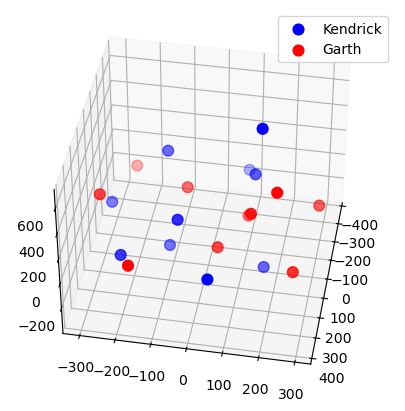

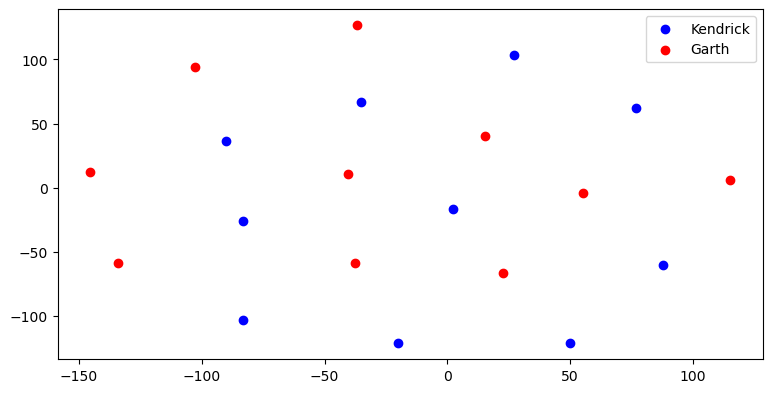

In [19]:
kendrick_3d = transformed_data_3d[:10]
k3_x = [i[0] for i in kendrick_3d]
k3_y = [i[1] for i in kendrick_3d]
k3_z = [i[2] for i in kendrick_3d]

garth_3d = transformed_data_3d[10:]
g3_x = [i[0] for i in garth_3d]
g3_y = [i[1] for i in garth_3d]
g3_z = [i[2] for i in garth_3d]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(k3_x, k3_y, k3_z, c='b', s=60, label='Kendrick')
ax.scatter(g3_x, g3_y, g3_z, c='red', s=60, label='Garth')
ax.view_init(40,10)
ax.legend()
plt.show()

kendrick_2d = transformed_data_2d[:10]
k2_x = [i[0] for i in kendrick_2d]
k2_y = [i[1] for i in kendrick_2d]

garth_2d = transformed_data_2d[10:]
g2_x = [i[0] for i in garth_2d]
g2_y = [i[1] for i in garth_2d]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(222)
ax.scatter(k2_x, k2_y, c='b', label='Kendrick')
ax.scatter(g2_x, g2_y, c='red', label='Garth')
ax.legend()
plt.show()

Both graphs show a basic trend among the red and blue dots, although the 3-dimensional graph is more informative than the 2-dimensional graph.
We see a separation between the two artists because they both have words that they use, but the other artist does not. 

The words in each song that are common to both are reduced to very small numbers or to 0, 
because of the log operation in the IDF function.
This means that the elements of each song vector with the highest values will be the ones that have words that are unique to that specific document, or at least are rarely used in others.  

